<a href="https://colab.research.google.com/github/fatemehgh1313/fatemehgh1313/blob/main/Q1_version1_99206399.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

##change python version
If you want to switch TensorFlow versions after import, you will need to restart your runtime with 'Runtime' -> 'Restart runtime...' and then specify the version before you import it again.

In [ ]:
#need factory reset runtime
import numpy as np
import tensorflow as tf
%tensorflow_version 1.x
tf.__version__

'1.15.2'

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


## import packages:


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import sklearn
np.random.seed(37) #dont change this line

#Load data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

data_train = np.genfromtxt('/content/drive/My Drive/deep/HW1/Q1_train.csv', delimiter=',')
data_train =data_train[1:,:]
data_test = np.genfromtxt('/content/drive/My Drive/deep/HW1/Q1_test.csv', delimiter=',')
data_test =data_test[1:,:]

for i in range(data_train.shape[0]):
   if data_train[i,0]>9 :
     data_train[i,0]=data_train[i,0]-1

for i in range(data_test.shape[0]):
   if data_test[i,0]>9 :
     data_test[i,0]=data_test[i,0]-1

In [ ]:
print(np.shape(data_train))
print(np.shape(data_test))

(27455, 785)
(7172, 785)


In [ ]:
data_train_withoutlabel = data_train[:,1:] 
data_test_withoutlabel = data_test[:,1:]
y_train = data_train[:,0]
y_test = data_test[:,0]

# standardize data
x_train =data_train_withoutlabel/255
x_test =data_test_withoutlabel/255

print(np.shape(x_test))
print(np.shape(x_train))
print(np.shape(y_test))
print(np.shape(y_train))

(7172, 784)
(27455, 784)
(7172,)
(27455,)


##show some datas

In [ ]:
#first we need to create dictionay
dictionary={0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'K',10:'L',11:'M',12:'N',13:'O',14:'P',15:'Q',16:'R',17:'S',18:'T',19:'U',20:'V',21:'W',22:'X',23:'Y'}

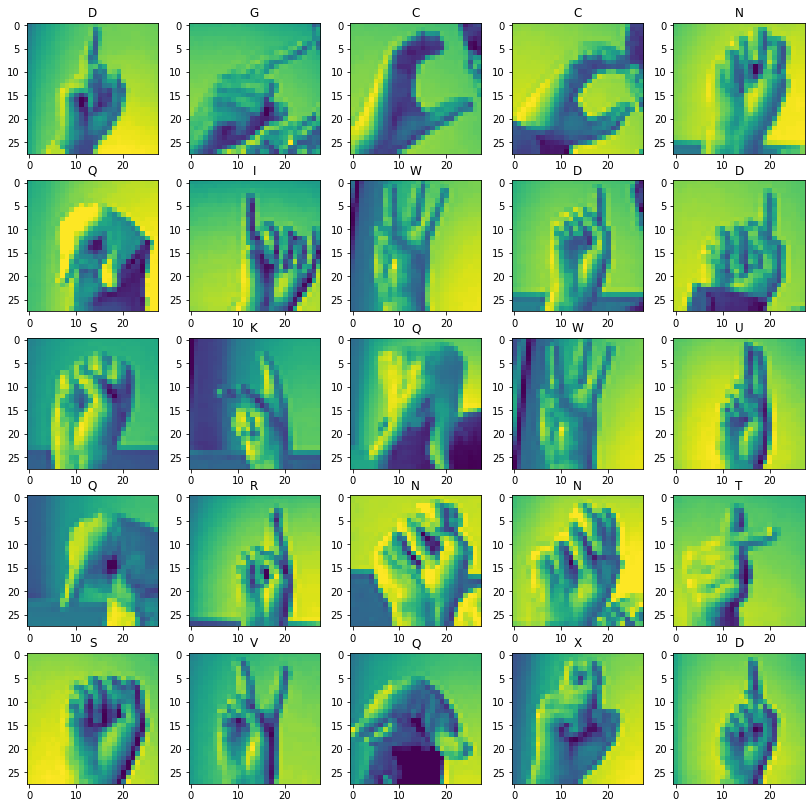

In [ ]:
import matplotlib.pyplot as plt
rows = 5
cols = 5
fig=plt.figure(figsize=(14,14))
axes = []


for i in range(1,cols*rows+1):
    axes.append( fig.add_subplot(rows, cols, i) )
    image=x_train[i-1,:]
    image=image.reshape(28,28)

    label=y_train[i-1]
    axes[i-1].set_title(dictionary[label])
    plt.imshow(image)
plt.show()

## One-Hot encoding of labels

we should one-hot encode the labels AND we standardize the data by setting its mean to zero and its variance to one.

In [ ]:
# one-hot encoding of labels
y_train =tf.Session().run(tf.one_hot(y_train,24))
y_test =tf.Session().run(tf.one_hot(y_test,24))
tf.Session().close()

print(np.shape(x_train))
print(np.shape(x_test))
print(np.shape(y_train))
print(np.shape(y_test))

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_test = x_test.T
y_test = y_test.T

(27455, 784)
(7172, 784)
(27455, 24)
(7172, 24)


##Shuffle

In [ ]:
X_train_shuffle = tf.Session().run(tf.random.shuffle(x_train,seed=12321))
Y_train_shuffle = tf.Session().run(tf.random.shuffle(y_train,seed=12321))

In [ ]:
# split train data into train and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
print(np.shape(X_train))
print(np.shape(X_val))
print(np.shape(Y_train))
print(np.shape(Y_val))

(21964, 784)
(5491, 784)
(21964, 24)
(5491, 24)


# define model:


activation functions

In [ ]:
# activation functions
def linear(x):
    #linear activation function's output is simply its input
    return x

def sigmoid(x):
    # out = np.array([1 / (1 + np.exp(-i)) if i > 0 else np.exp(i)/(1+np.exp(i)) for i in x])
    out = 1 / (1 + np.exp(-x))
    return out

def softmax(x):
    exps = np.exp(x)
    return exps/np.sum(exps)

def relu(x):
    out = np.maximum(0, x)
    return out

# activation gradients
def relu_backward(dA, Z):
    out = relu(Z)
    dZ = np.multiply(dA, np.int64(out > 0))
    return dZ

def linear_fn_backward(dA, Z):
    dZ = dA * np.ones_like(Z)
    return dZ
def sigmoid_backward(dA, Z):
    out = sigmoid(Z)
    dZ = dA * out * (1 - out)
    return dZ
    
# a method to choose between activation functions
def activate(activation, x):
    if activation == 'relu':
        return relu(x)
    elif activation == 'softmax':
        return softmax(x)
    elif activation == 'linear':
        return linear(x)
    else:
        raise NotImplementedError('Undefined activation function')

loss functions

In [ ]:
# loss functions
def cross_entropy(y_hat, y):
    m = y.shape[0]
    loss = - (1 / m) * np.sum(np.multiply(y, np.log(y_hat))) 
    return loss

def binary_cross_entropy(y_hat, y):
    m = y.shape[0]
    loss = - (1 / m) * np.sum(np.multiply(y, np.log(y_hat)) + np.multiply((1-y), np.log(1-y_hat)))
    return loss

# loss gradients
def BCE_backward(z,y):
    dz = np.divide(z - y ,np.multiply(z, 1 - z)) 
    return dz

def CE_backward(z,y):
    dz = np.divide(-y, z) 
    return dz

# loss gradients when the last layer's activation function is softmax
def CE_Softmax_backward(z, y):
    dz = z - y
    return dz

def BCE_Softmax_backward(z, y):
    y_z = np.divide((y - z), (1 - z))
    tmp = np.ones((np.shape(y)[0], np.shape(y)[0]))
    np.fill_diagonal(tmp, 0)
    dz = z - y + np.multiply(z, np.matmul(tmp, y_z))
    return dz

computation of gradients

In [ ]:
# computation of weight and bias gradients
def linear_backward(dz, cache):
    A_prev, W, b = cache
    m = A_prev.shape[0]

    dW = (1 / m) * np.dot(np.expand_dims(dz, axis=1), np.expand_dims(A_prev.T, axis=0))
    db = (1 / m) * np.sum(dz, keepdims=True)
    dA_prev = np.dot(W.T, dz)

    return dA_prev, dW, db

# computation of activation gradients
def activation_backward(dA, cache, activation_fn):
    linear_cache, activation_cache = cache

    if activation_fn == 'linear':
        dz = linear_fn_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dz, linear_cache)

    elif activation_fn == 'relu':
        dz = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dz, linear_cache)
    else:
        raise NotImplementedError('Undefined activation function')

    return dA_prev, dW, db

# computation of loss+activation gradients when activation function is softmax
def activation_backward_softmax(AL, Y, cache, loss_type):
    linear_cache, activation_cache = cache
    
    if loss_type == 'cross_entropy' or loss_type == 'ce':
        dz = CE_Softmax_backward(AL, Y)
        dA_prev, dW, db = linear_backward(dz, linear_cache)
    elif loss_type == 'binary_cross_entropy' or loss_type == 'bce':
        dz = BCE_Softmax_backward(AL, Y)
    else:
        raise NotImplementedError('Undefined cost function')    
    return dA_prev, dW, db

initialize weights and biases

In [ ]:
def initialize_parameters(units, input_dim):
    w = np.random.normal(0, 0.01, (units, input_dim))
    b = np.random.normal(0, 0.01, units)
    return w, b

computation of the network's loss

In [ ]:
def compute_cost(al, Y, loss_type):
    loss_type = loss_type.lower()
    if loss_type == 'cross_entropy' or loss_type == 'ce':
        cost = cross_entropy(al, Y)
    elif loss_type == 'binary_cross_entropy' or loss_type == 'bce':
        cost = binary_cross_entropy(al, Y)
    else:
        raise NotImplementedError('Undefined cost function')          
    return cost

forward/backward propogation

In [ ]:
def forward_propagation(X, parameters, activations):
    caches = []
    input_vec = X
    L = len(parameters) // 2
    
    for l in range(1, L+1):
        z = np.matmul(parameters['W'+str(l)], input_vec) + parameters['b'+str(l)]
        y = activate(activations[l-1], z)
        linear_cache = (input_vec, parameters['W'+str(l)], parameters['b'+str(l)])
        activation_cache = (z)
        cache = (linear_cache, activation_cache)
        input_vec = y
        caches.append(cache)
    a = input_vec
        
    return a, caches

def backward_propagation(AL, Y, cache, activations, loss_type):
    
    Y = Y.reshape(np.shape(AL))
    L = len(cache)
    gradient = {}
    
    loss_type = loss_type.lower()
    if loss_type == 'cross_entropy' or loss_type == 'ce':
        if activations[-1] == 'softmax':
             gradient['dA'+str(L-1)], gradient['dW'+str(L)], gradient['db'+str(L)] = \
                activation_backward_softmax(AL, Y, cache[L-1], loss_type)
        else:
            dAL = CE_backward(AL, Y)
            gradient['dA'+str(L-1)], gradient['dW'+str(L)], gradient['db'+str(L)] = \
               activation_backward(dAL, cache[L-1], activations[-1])
    elif loss_type == 'binary_cross_entropy' or loss_type == 'bce':
        if activations[-1] == 'softmax':
             gradient['dA'+str(L-1)], gradient['dW'+str(L)], gradient['db'+str(L)] = \
                activation_backward_softmax(AL, Y, cache[L-1], loss_type)
        else:
            dAL = BCE_backward(AL, Y)
            gradient['dA'+str(L-1)], gradient['dW'+str(L)], gradient['db'+str(L)] = \
               activation_backward(dAL, cache[L-1], activations[-1])
    else:
        raise NotImplementedError('Undefined cost function')
        
    #gradient['dA'+str(L-1)], gradient['dW'+str(L)], gradient['db'+str(L)] = 
    #    activation_backward(dAL, cache[L-1], activations[-1])
    
    for l in range(L-1, 0, -1):
        current_cache = cache[l-1]
        gradient['dA'+str(l-1)], gradient['dW'+str(l)], gradient['db'+str(l)] = \
            activation_backward(gradient['dA'+str(l)], current_cache, activations[l-1])
    
    return gradient

make minibatch

In [ ]:
def make_mini_batches(batch_size, N):
    minibatches = np.random.randint(0, N, batch_size)
    return minibatches

##GD

In [ ]:
def update_parameters_with_gd(parameters, grads, learning_rate):
    
    L = len(parameters) // 2
    
    for l in range(1, L+1):
        parameters['W'+str(l)] -= learning_rate * grads['dW'+str(l)]
        parameters['b'+str(l)] -= learning_rate * grads['db'+str(l)]
    
    return parameters

##adam

In [ ]:
def initialize_adam(parameters) :
    
    return adam_parameters

def update_parameters_with_adam(parameters, grads, adam_parameters, learning_rate,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):

    L = len(parameters) // 2
    num_updates = 0
    
    for l in range(1, L+1):
        
        num_updates += 1
        
        adam_parameters['sw'+str(l)] = beta1 * adam_parameters['sw'+str(l)] + (1 - beta1) * grads['dW'+str(l)]
        adam_parameters['sb'+str(l)] = beta1 * adam_parameters['sb'+str(l)] + (1 - beta1) * grads['db'+str(l)]
        adam_parameters['rw'+str(l)] = beta2 * adam_parameters['rw'+str(l)] + (1 - beta2) * (grads['dW'+str(l)] ** 2)
        adam_parameters['rb'+str(l)] = beta2 * adam_parameters['rb'+str(l)] + (1 - beta2) * (grads['db'+str(l)] ** 2)
        
        sw_hat = adam_parameters['sw'+str(l)] / (1 - np.power(beta1, num_updates))
        rw_hat = adam_parameters['rw'+str(l)] / (1 - np.power(beta2, num_updates))
        parameters['W'+str(l)] -= (learning_rate / np.sqrt(rw_hat+epsilon))*sw_hat
        
        sb_hat = adam_parameters['sb'+str(l)] / (1 - np.power(beta1, num_updates))
        rb_hat = adam_parameters['rb'+str(l)] / (1 - np.power(beta2, num_updates))
        parameters['b'+str(l)] -= (learning_rate / np.sqrt(rb_hat+epsilon))*sb_hat   
    
    return parameters, adam_parameters

# Normal Training:

In [ ]:
class VanilaNN(object):
    """
    naive implemetation of Neural Network with desired layers and activations.
    """
    def __init__(self, layers_def={1:{"type":"fc","units":64,"activation":"sigmoid"},
                                     2:{"type":"fc","units":128,"activation":"sigmoid"},
                                     3:{"type":"fc","units":24,"activation":"softmax"}
                                    },loss="cross_entropy", optimizer='adam', optimizer_parameters={'beta1':0.9,'beta2':0.999,'epsilon':1e-8}):
        self.loss = loss
        self.optimizer = optimizer
        self.optimizer_parameters = optimizer_parameters
        self.adam_parameters = {}
        self.layer_parameters = {}
        self.activations = []
        self.units = []
        
        for key in layers_def:
            l = layers_def[key]
            self.units.append(l['units'])
            self.activations.append(l['activation'])
        
    def train(self,X, Y,X_val, Y_val, learning_rate = 0.001, batch_size = 64, num_epochs = 24,print_cost = True):
        N = np.shape(X)[1]
        
        #initialize layers' parameters
        L = len(self.units)
        input_dim = np.shape(X)[0]
        for i in range(L):
            w, b = initialize_parameters(self.units[i], input_dim)
            self.layer_parameters['W'+str(i+1)] = w
            self.layer_parameters['b'+str(i+1)] = b
            if self.optimizer == 'adam':
                self.adam_parameters['sw'+str(i+1)] = np.zeros_like(w)
                self.adam_parameters['sb'+str(i+1)] = np.zeros_like(b)
                self.adam_parameters['rw'+str(i+1)] = np.zeros_like(w)
                self.adam_parameters['rb'+str(i+1)] = np.zeros_like(b)
            input_dim = self.units[i]
        
        train_loss_hist = []
        train_acc_hist = []
        val_loss_hist = []
        val_acc_hist = []
        
        
        # Optimization loop
        for i in range(num_epochs):
            
            train_loss = 0
            # get random minibatches indices.
            minibatches = make_mini_batches(batch_size, N)
            minibatch_grads = {}
            for minibatch in minibatches:
                # Select a minibatch
                minibatch_X = X[:,minibatch]
                minibatch_Y = Y[:,minibatch]
                # Forward propagation
                a, caches = forward_propagation(minibatch_X, self.layer_parameters, self.activations)
                
                # Compute cost
                cost = compute_cost(a, minibatch_Y, self.loss)   
                
                # Backward propagation
                grads = backward_propagation(a, minibatch_Y, caches, self.activations, self.loss)
                
                # Update parameters
                if self.optimizer == "sgd":
                    self.layer_parameters = update_parameters_with_gd(self.layer_parameters, grads, learning_rate)
                elif self.optimizer == "adam":
                    self.layer_parameters, self.adam_parameters = update_parameters_with_adam(
                        self.layer_parameters, grads, self.adam_parameters, learning_rate,
                        self.optimizer_parameters['beta1'], self.optimizer_parameters['beta2'],
                        self.optimizer_parameters['epsilon'])
                else:
                  raise NotImplementedError('Undefined optimizer')
                
                
                train_loss += cost
            
            train_loss_hist.append(train_loss/batch_size)
            train_acc_hist.append(1-train_loss/batch_size)
            
            test_acc, test_loss = self.evaluate(X_val, Y_val, 1)
            val_acc_hist.append(test_acc)
            val_loss_hist.append(test_loss)                       

        history = {'loss_train': train_loss_hist,
                   'loss_val': val_loss_hist,
                   'accuracy_train': train_acc_hist,
                   'accuracy_val': val_acc_hist}
        return history
    
    def evaluate(self, x_test, y_test,batch_size):
        """
        Arguments:
          x_test: input data, of shape (features, N)
          y_test : true label (num_classes, N)
        returns:
          acc, cost
        """
        N = x_test.shape[1]
        cost = 0
        
        for i in range(N):
            a, _ = forward_propagation(x_test[:, i], self.layer_parameters, self.activations)
            cost += compute_cost(a, y_test[:, i], self.loss)/N
        acc = 1 - cost
        
        return acc, cost
    def predict(self, x_test, batch_size=512):
        """
        Arguments:
          x_test: input data, of shape (features, N)
        returns:
          predicted values
        """
        N = x_test.shape[1]
        predictions = []
        
        for i in range(N):
            test_vec = x_test[:, i]
            a, _ = forward_propagation(test_vec, self.layer_parameters, self.activations)
            if self.activations[-1] != 'linear':
                y_hat = (a >= 0.5) * 1
            else:
                y_hat = (a > 0) * 1
            predictions.append(y_hat)            
                
        return predictions

In [ ]:
model = VanilaNN(layers_def={1:{"type":"fc","units":64,"activation":"relu"},
                                    # 2:{"type":"fc","units":128,"activation":"relu"},
                                     2:{"type":"fc","units":24,"activation":"softmax"}
                                    }, optimizer='sgd', loss='cross_entropy')
history = model.train(X_train.T, Y_train.T, X_val.T, Y_val.T, learning_rate=1, num_epochs=200)

## Evaluate model:

In [ ]:
batch_size = 64
test_acc, test_loss = model.evaluate(x_test, y_test,batch_size)
print("Accuracy = %2.2f, Loss = %2.4f"%(test_acc, test_loss))

Accuracy = 0.96, Loss = 0.0384


## plot training history:

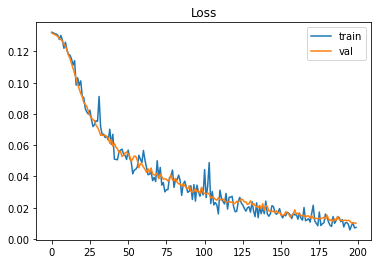

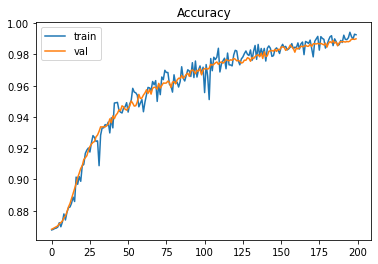

In [ ]:
# plot loss
plt.plot(history['loss_train'],'', history['loss_val'],'-')
plt.title('Loss')
plt.legend(['train','val'])
plt.show()

# plot accuracy
plt.plot(history['accuracy_train'],'', history['accuracy_val'],'-')
plt.title('Accuracy')
plt.legend(['train','val'])
plt.show()

In [ ]:
# make a prediction:
# ALL NUM OF TEST = 7172
n = 2
prediction = model.predict(x_test[:,n:n+1])
print('prediction: ', prediction[0], " true label: ",y_test[:, n])

prediction:  [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]  true label:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


#Using tensor board

In [ ]:
%load_ext tensorboard
# Import SummaryWriter
from torch.utils.tensorboard import SummaryWriter

# Create a SummaryWriter instance
# SummaryWriter writes event files to log_dir
log_dir = "logs"
writer = SummaryWriter(log_dir)

In [ ]:
def forward_propagation(X, parameters, activations):
    caches = []
    input_vec = X
    L = len(parameters) // 2
    
    for l in range(1, L+1):
        z = np.matmul(parameters['W'+str(l)], input_vec) + parameters['b'+str(l)]
        y = activate(activations[l-1], z)
        linear_cache = (input_vec, parameters['W'+str(l)], parameters['b'+str(l)])
        activation_cache = (z)
        cache = (linear_cache, activation_cache)
        input_vec = y
        caches.append(cache)
    a = input_vec
        
    return a, caches, z

def backward_propagation(AL, Y, cache, activations, loss_type):
    
    Y = Y.reshape(np.shape(AL))
    L = len(cache)
    gradient = {}
    
    loss_type = loss_type.lower()
    if loss_type == 'cross_entropy' or loss_type == 'ce':
        if activations[-1] == 'softmax':
             gradient['dA'+str(L-1)], gradient['dW'+str(L)], gradient['db'+str(L)] = \
                activation_backward_softmax(AL, Y, cache[L-1], loss_type)
        else:
            dAL = CE_backward(AL, Y)
            gradient['dA'+str(L-1)], gradient['dW'+str(L)], gradient['db'+str(L)] = \
               activation_backward(dAL, cache[L-1], activations[-1])
    elif loss_type == 'binary_cross_entropy' or loss_type == 'bce':
        if activations[-1] == 'softmax':
             gradient['dA'+str(L-1)], gradient['dW'+str(L)], gradient['db'+str(L)] = \
                activation_backward_softmax(AL, Y, cache[L-1], loss_type)
        else:
            dAL = BCE_backward(AL, Y)
            gradient['dA'+str(L-1)], gradient['dW'+str(L)], gradient['db'+str(L)] = \
               activation_backward(dAL, cache[L-1], activations[-1])
    else:
        raise NotImplementedError('Undefined cost function')
        
    #gradient['dA'+str(L-1)], gradient['dW'+str(L)], gradient['db'+str(L)] = 
    #    activation_backward(dAL, cache[L-1], activations[-1])
    
    for l in range(L-1, 0, -1):
        current_cache = cache[l-1]
        gradient['dA'+str(l-1)], gradient['dW'+str(l)], gradient['db'+str(l)] = \
            activation_backward(gradient['dA'+str(l)], current_cache, activations[l-1])
    
    return gradient

In [ ]:
class VanilaNN(object):
    """
    naive implemetation of Neural Network with desired layers and activations.
    """
    def __init__(self, layers_def={1:{"type":"fc","units":64,"activation":"sigmoid"},
                                     2:{"type":"fc","units":128,"activation":"sigmoid"},
                                     3:{"type":"fc","units":24,"activation":"softmax"}
                                    },loss="cross_entropy", optimizer='adam', optimizer_parameters={'beta1':0.9,'beta2':0.999,'epsilon':1e-8}):
        self.loss = loss
        self.optimizer = optimizer
        self.optimizer_parameters = optimizer_parameters
        self.adam_parameters = {}
        self.layer_parameters = {}
        self.activations = []
        self.units = []
        
        for key in layers_def:
            l = layers_def[key]
            self.units.append(l['units'])
            self.activations.append(l['activation'])
        
    def train(self,X, Y,X_val, Y_val, learning_rate = 0.001, batch_size = 64, num_epochs = 24,print_cost = True):
        N = np.shape(X)[1]
        
        #initialize layers' parameters
        L = len(self.units)
        input_dim = np.shape(X)[0]

        for i in range(L):
            w, b = initialize_parameters(self.units[i], input_dim)

            ##########################
            #writer.add_histogram('distribution weights of layer', w + i, i)
            ##########################

            self.layer_parameters['W'+str(i+1)] = w
            self.layer_parameters['b'+str(i+1)] = b
            if self.optimizer == 'adam':
                self.adam_parameters['sw'+str(i+1)] = np.zeros_like(w)
                self.adam_parameters['sb'+str(i+1)] = np.zeros_like(b)
                self.adam_parameters['rw'+str(i+1)] = np.zeros_like(w)
                self.adam_parameters['rb'+str(i+1)] = np.zeros_like(b)
            input_dim = self.units[i]
        
        train_loss_hist = []
        train_acc_hist = []
        val_loss_hist = []
        val_acc_hist = []
        
        
        # Optimization loop
        for i in range(num_epochs):
            
            train_loss = 0
            # get random minibatches indices.
            minibatches = make_mini_batches(batch_size, N)
            minibatch_grads = {}

            for minibatch in minibatches:
                # Select a minibatch
                minibatch_X = X[:,minibatch]
                minibatch_Y = Y[:,minibatch]
                # Forward propagation
                a, caches,z= forward_propagation(minibatch_X, self.layer_parameters, self.activations)

                ###############################################################
                #Tensorboard
                writer.add_histogram('distribution weights of layer', z + i, i)
                ###############################################################


                # Compute cost
                cost = compute_cost(a, minibatch_Y, self.loss)         
                
                # Backward propagation
                grads = backward_propagation(a, minibatch_Y, caches, self.activations, self.loss)
                # Update parameters
                if self.optimizer == "sgd":
                    self.layer_parameters = update_parameters_with_gd(self.layer_parameters, grads, learning_rate)
                elif self.optimizer == "adam":
                    self.layer_parameters, self.adam_parameters = update_parameters_with_adam(
                        self.layer_parameters, grads, self.adam_parameters, learning_rate,
                        self.optimizer_parameters['beta1'], self.optimizer_parameters['beta2'],
                        self.optimizer_parameters['epsilon'])
                else:
                  raise NotImplementedError('Undefined optimizer')

                train_loss += cost     


            train_loss_hist.append(train_loss/batch_size)
            train_acc_hist.append(1-train_loss/batch_size)
            #####################################
            #Tensorboard
            # Load TensorBoard notebook extension
            writer.add_scalar('train_loss', train_loss/batch_size,num_epochs)  # value:train_loss_hist step:num_epochs
            writer.add_scalar('train_acc', 1-train_loss/batch_size,num_epochs)
            ######################################       


            test_acc, test_loss = self.evaluate(X_val, Y_val, 1)
            #####################################################
            # Tensorboard
            # Load TensorBoard notebook extension
            writer.add_scalar('val_loss', test_loss,num_epochs*200)
            writer.add_scalar('val_acc', test_acc,num_epochs*200)   
            #####################################################

            val_acc_hist.append(test_acc)
            val_loss_hist.append(test_loss)  

            # Once you are done, close the writer
            writer.close()

        # Start Tensorboard to see what's written
        %tensorboard --logdir=logs

        history = {'loss_train': train_loss_hist,
                   'loss_val': val_loss_hist,
                   'accuracy_train': train_acc_hist,
                   'accuracy_val': val_acc_hist}
        return history
    
    def evaluate(self, x_test, y_test,batch_size):
        N = x_test.shape[1]
        cost = 0
        
        for i in range(N):
            a, _,z = forward_propagation(x_test[:, i], self.layer_parameters, self.activations)
            cost += compute_cost(a, y_test[:, i], self.loss)/N
        acc = 1 - cost
        
        return acc, cost
    def predict(self, x_test, batch_size=512):
        N = x_test.shape[1]
        predictions = []
        
        for i in range(N):
            test_vec = x_test[:, i]
            a, _ = forward_propagation(test_vec, self.layer_parameters, self.activations)
            if self.activations[-1] != 'linear':
                y_hat = (a >= 0.5) * 1
            else:
                y_hat = (a > 0) * 1
            predictions.append(y_hat)            
                
        return predictions

In [ ]:
model = VanilaNN(layers_def={1:{"type":"fc","units":64,"activation":"relu"},
                                     2:{"type":"fc","units":128,"activation":"relu"},
                                     3:{"type":"fc","units":24,"activation":"softmax"}
                                    }, optimizer='sgd', loss='cross_entropy')
history = model.train(X_train.T, Y_train.T, X_val.T, Y_val.T, learning_rate=1, num_epochs=200)

Reusing TensorBoard on port 6006 (pid 739), started 3:09:13 ago. (Use '!kill 739' to kill it.)

## Evaluate model:

In [ ]:
batch_size = 64
test_acc, test_loss = model.evaluate(x_test, y_test,batch_size)
print("Accuracy = %2.2f, Loss = %2.4f"%(test_acc, test_loss))

Accuracy = 0.94, Loss = 0.0575


## plot training history:

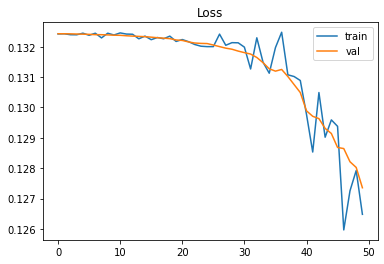

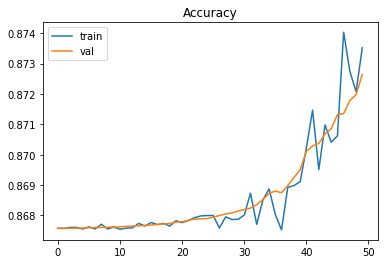

In [ ]:
# plot loss
plt.plot(history['loss_train'],'', history['loss_val'],'-')
plt.title('Loss')
plt.legend(['train','val'])
plt.show()

#some example
new_testt = np.zeros((784,5))
m=x_test[:,222:223]
n=x_test[:,2685:2686]
l=x_test[:,1023:1024]
o=x_test[:,2201:2202]
p=x_test[:,115:116]
new_testt[:,0]=m[:,0]
new_testt[:,1]=n[:,0]
new_testt[:,2]=l[:,0]
new_testt[:,3]=o[:,0]
new_testt[:,4]=p[:,0]

# plot accuracy
plt.plot(history['accuracy_train'],'', history['accuracy_val'],'-')
plt.title('Accuracy')
plt.legend(['train','val'])
plt.show()

#Training by Drop out
Line 32

In [ ]:
def forward_propagation(X, parameters, activations):
    caches = []
    input_vec = X
    L = len(parameters) // 2
    
    for l in range(1, L+1):
        z = np.matmul(parameters['W'+str(l)], input_vec) + parameters['b'+str(l)]
        y = activate(activations[l-1], z)
        linear_cache = (input_vec, parameters['W'+str(l)], parameters['b'+str(l)])
        activation_cache = (z)
        cache = (linear_cache, activation_cache)
        input_vec = y
        caches.append(cache)
    a = input_vec
        
    return a, caches

def backward_propagation(AL, Y, cache, activations, loss_type):
    
    Y = Y.reshape(np.shape(AL))
    L = len(cache)
    gradient = {}
    
    loss_type = loss_type.lower()
    if loss_type == 'cross_entropy' or loss_type == 'ce':
        if activations[-1] == 'softmax':
             gradient['dA'+str(L-1)], gradient['dW'+str(L)], gradient['db'+str(L)] = \
                activation_backward_softmax(AL, Y, cache[L-1], loss_type)
        else:
            dAL = CE_backward(AL, Y)
            gradient['dA'+str(L-1)], gradient['dW'+str(L)], gradient['db'+str(L)] = \
               activation_backward(dAL, cache[L-1], activations[-1])
    elif loss_type == 'binary_cross_entropy' or loss_type == 'bce':
        if activations[-1] == 'softmax':
             gradient['dA'+str(L-1)], gradient['dW'+str(L)], gradient['db'+str(L)] = \
                activation_backward_softmax(AL, Y, cache[L-1], loss_type)
        else:
            dAL = BCE_backward(AL, Y)
            gradient['dA'+str(L-1)], gradient['dW'+str(L)], gradient['db'+str(L)] = \
               activation_backward(dAL, cache[L-1], activations[-1])
    else:
        raise NotImplementedError('Undefined cost function')
        
    #gradient['dA'+str(L-1)], gradient['dW'+str(L)], gradient['db'+str(L)] = 
    #    activation_backward(dAL, cache[L-1], activations[-1])
    
    for l in range(L-1, 0, -1):
        current_cache = cache[l-1]
        gradient['dA'+str(l-1)], gradient['dW'+str(l)], gradient['db'+str(l)] = \
            activation_backward(gradient['dA'+str(l)], current_cache, activations[l-1])
    
    return gradient

In [ ]:
class VanilaNN(object):
    """
    naive implemetation of Neural Network with desired layers and activations.
    """
    def __init__(self, layers_def={1:{"type":"fc","units":64,"activation":"sigmoid"},
                                     2:{"type":"fc","units":128,"activation":"sigmoid"},
                                     3:{"type":"fc","units":24,"activation":"softmax"}
                                    },loss="cross_entropy", optimizer='adam', optimizer_parameters={'beta1':0.9,'beta2':0.999,'epsilon':1e-8}):
        self.loss = loss
        self.optimizer = optimizer
        self.optimizer_parameters = optimizer_parameters
        self.adam_parameters = {}
        self.layer_parameters = {}
        self.activations = []
        self.units = []
        
        for key in layers_def:
            l = layers_def[key]
            self.units.append(l['units'])
            self.activations.append(l['activation'])
        
    def train(self,X, Y,X_val, Y_val, learning_rate = 0.001, batch_size = 64, num_epochs = 24,print_cost = True):
        N = np.shape(X)[1]
        
        #initialize layers' parameters
        L = len(self.units)
        input_dim = np.shape(X)[0]
        
        for i in range(L):   
          w, b = initialize_parameters(self.units[i], input_dim)

          ######################################################
          ################ Dropout #############################
          if i==0:      
            tf.nn.dropout(w,keep_prob=None,noise_shape=None,seed=None,name=None,rate=0.5)
            tf.nn.dropout(b,keep_prob=None,noise_shape=None,seed=None,name=None,rate=0.5)
          ########################################################
          
          self.layer_parameters['W'+str(i+1)] = w
          self.layer_parameters['b'+str(i+1)] = b
          if self.optimizer == 'adam':
            self.adam_parameters['sw'+str(i+1)] = np.zeros_like(w)
            self.adam_parameters['sb'+str(i+1)] = np.zeros_like(b)
            self.adam_parameters['rw'+str(i+1)] = np.zeros_like(w)
            self.adam_parameters['rb'+str(i+1)] = np.zeros_like(b)
          input_dim = self.units[i]
          # print(self.units[i])
          # print('w=',np.shape(w))

        train_loss_hist = []
        train_acc_hist = []
        val_loss_hist = []
        val_acc_hist = []
        
        
        # Optimization loop
        for i in range(num_epochs):
            
            train_loss = 0
            # get random minibatches indices.
            minibatches = make_mini_batches(batch_size, N)
            minibatch_grads = {}



            for minibatch in minibatches:
                # Select a minibatch
                minibatch_X = X[:,minibatch]
                minibatch_Y = Y[:,minibatch]
                
                # Forward propagation
                a, caches = forward_propagation(minibatch_X, self.layer_parameters, self.activations)
                
                # Compute cost
                cost = compute_cost(a, minibatch_Y, self.loss)
                
                
                # Backward propagation
                grads = backward_propagation(a, minibatch_Y, caches, self.activations, self.loss)
                
                
                # Update parameters
                if self.optimizer == "sgd":
                    self.layer_parameters = update_parameters_with_gd(self.layer_parameters, grads, learning_rate)
                elif self.optimizer == "adam":
                    self.layer_parameters, self.adam_parameters = update_parameters_with_adam(
                        self.layer_parameters, grads, self.adam_parameters, learning_rate,
                        self.optimizer_parameters['beta1'], self.optimizer_parameters['beta2'],
                        self.optimizer_parameters['epsilon'])
                else:
                  raise NotImplementedError('Undefined optimizer')
                
                
                train_loss += cost           
            
            train_loss_hist.append(train_loss/batch_size)
            train_acc_hist.append(1-train_loss/batch_size)
            
            test_acc, test_loss = self.evaluate(X_val, Y_val, 1)
            val_acc_hist.append(test_acc)
            val_loss_hist.append(test_loss)
            

        history = {'loss_train': train_loss_hist,
                   'loss_val': val_loss_hist,
                   'accuracy_train': train_acc_hist,
                   'accuracy_val': val_acc_hist}
        return history
    
    def evaluate(self, x_test, y_test,batch_size):
        """
        Arguments:
          x_test: input data, of shape (features, N)
          y_test : true label (num_classes, N)
        returns:
          acc, cost
        """
        N = x_test.shape[1]
        cost = 0
        
        for i in range(N):
            a, _ = forward_propagation(x_test[:, i], self.layer_parameters, self.activations)
            cost += compute_cost(a, y_test[:, i], self.loss)/N
        acc = 1 - cost
        
        return acc, cost
    def predict(self, x_test, batch_size=512):
        """
        Arguments:
          x_test: input data, of shape (features, N)
        returns:
          predicted values
        """
        N = x_test.shape[1]
        predictions = []
        
        for i in range(N):
            test_vec = x_test[:, i]
            a, _ = forward_propagation(test_vec, self.layer_parameters, self.activations)
            if self.activations[-1] != 'linear':
                y_hat = (a >= 0.5) * 1
            else:
                y_hat = (a > 0) * 1
            predictions.append(y_hat)            
                
        return predictions

In [ ]:
model = VanilaNN(layers_def={1:{"type":"fc","units":64,"activation":"relu"},
                                     #2:{"type":"fc","units":128,"activation":"relu"},
                                     2:{"type":"fc","units":24,"activation":"softmax"}
                                    }, optimizer='sgd', loss='cross_entropy')
history = model.train(X_train.T, Y_train.T, X_val.T, Y_val.T, learning_rate=1, num_epochs=200)

##Evaluate model

In [ ]:
batch_size = 64
test_acc, test_loss = model.evaluate(x_test, y_test,batch_size)
print("Accuracy = %2.2f, Loss = %2.4f"%(test_acc, test_loss))

Accuracy = 0.96, Loss = 0.0388


## plot training and validation history:

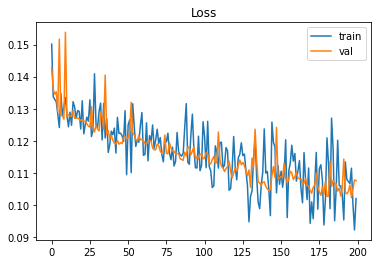

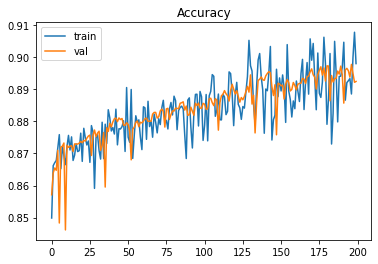

In [ ]:
# plot loss
plt.plot(history['loss_train'],'', history['loss_val'],'-')
plt.title('Loss')
plt.legend(['train','val'])
plt.show()
# plot accuracy
plt.plot(history['accuracy_train'],'', history['accuracy_val'],'-')
plt.title('Accuracy')
plt.legend(['train','val'])
plt.show()

#Training by batch normalization
line 57

In [ ]:
class VanilaNN(object):
    """
    naive implemetation of Neural Network with desired layers and activations.
    """
    def __init__(self, layers_def={1:{"type":"fc","units":64,"activation":"sigmoid"},
                                     2:{"type":"fc","units":128,"activation":"sigmoid"},
                                     3:{"type":"fc","units":24,"activation":"softmax"}
                                    },loss="cross_entropy", optimizer='adam', optimizer_parameters={'beta1':0.9,'beta2':0.999,'epsilon':1e-8}):
        self.loss = loss
        self.optimizer = optimizer
        self.optimizer_parameters = optimizer_parameters
        self.adam_parameters = {}
        self.layer_parameters = {}
        self.activations = []
        self.units = []
        
        for key in layers_def:
            l = layers_def[key]
            self.units.append(l['units'])
            self.activations.append(l['activation'])
        
    def train(self,X, Y,X_val, Y_val, learning_rate = 0.001, batch_size = 64, num_epochs = 24,print_cost = True):
        N = np.shape(X)[1]
        
        #initialize layers' parameters
        L = len(self.units)
        input_dim = np.shape(X)[0]
        
        for i in range(L):   
          w, b = initialize_parameters(self.units[i], input_dim)
          self.layer_parameters['W'+str(i+1)] = w
          self.layer_parameters['b'+str(i+1)] = b
          if self.optimizer == 'adam':
            self.adam_parameters['sw'+str(i+1)] = np.zeros_like(w)
            self.adam_parameters['sb'+str(i+1)] = np.zeros_like(b)
            self.adam_parameters['rw'+str(i+1)] = np.zeros_like(w)
            self.adam_parameters['rb'+str(i+1)] = np.zeros_like(b)
          input_dim = self.units[i]
          # print(self.units[i])
          # print('w=',np.shape(w))

        train_loss_hist = []
        train_acc_hist = []
        val_loss_hist = []
        val_acc_hist = []
        
        
        # Optimization loop
        for i in range(num_epochs):
            
            train_loss = 0
            # get random minibatches indices.
            minibatches = make_mini_batches(batch_size, N)
            minibatch_grads = {}


            ###################################################
            #Batch normalization
            new_minibatches_X = np.zeros((784,len(minibatches)))   
            new_minibatches_Y = np.zeros((24,len(minibatches)))        
            for i in range (len(minibatches)):
                m = minibatches[i]
                new_minibatches_X[:,i] = X[:,m] 
                new_minibatches_Y[:,i] = Y[:,m] 
            new_minibatches_X = new_minibatches_X - new_minibatches_X.mean(axis=0)
            new_minibatches_X = new_minibatches_X / np.abs(new_minibatches_X).max(axis=0)
            #print(np.shape(new_minibatches_X))
            ###################################################


            for minibatch in range(len(minibatches)):
                # Select a minibatch
                minibatch_X = new_minibatches_X[:,minibatch]
                minibatch_Y = new_minibatches_Y[:,minibatch]

                # Forward propagation
                a, caches = forward_propagation(minibatch_X, self.layer_parameters, self.activations)
                
                # Compute cost
                cost = compute_cost(a, minibatch_Y, self.loss)
                
                
                # Backward propagation
                grads = backward_propagation(a, minibatch_Y, caches, self.activations, self.loss)
                
                
                # Update parameters
                if self.optimizer == "sgd":
                    self.layer_parameters = update_parameters_with_gd(self.layer_parameters, grads, learning_rate)
                elif self.optimizer == "adam":
                    self.layer_parameters, self.adam_parameters = update_parameters_with_adam(
                        self.layer_parameters, grads, self.adam_parameters, learning_rate,
                        self.optimizer_parameters['beta1'], self.optimizer_parameters['beta2'],
                        self.optimizer_parameters['epsilon'])
                else:
                  raise NotImplementedError('Undefined optimizer')
                
                
                train_loss += cost           
            
            train_loss_hist.append(train_loss/batch_size)
            train_acc_hist.append(1-train_loss/batch_size)
            
            test_acc, test_loss = self.evaluate(X_val, Y_val, 1)
            val_acc_hist.append(test_acc)
            val_loss_hist.append(test_loss)
            

        history = {'loss_train': train_loss_hist,
                   'loss_val': val_loss_hist,
                   'accuracy_train': train_acc_hist,
                   'accuracy_val': val_acc_hist}
        return history
    
    def evaluate(self, x_test, y_test,batch_size):
        N = x_test.shape[1]
        cost = 0
        
        for i in range(N):
            a, _ = forward_propagation(x_test[:, i], self.layer_parameters, self.activations)
            cost += compute_cost(a, y_test[:, i], self.loss)/N
        acc = 1 - cost 
        
        return acc, cost
    def predict(self, x_test, batch_size = 512):
        N = x_test.shape[1]
        predictions = []
        
        for i in range(N):
            test_vec = x_test[:, i]
            a, _ = forward_propagation(test_vec, self.layer_parameters, self.activations)
            if self.activations[-1] != 'linear':
                y_hat = (a >= 0.5) * 1
            else:
                y_hat = (a > 0) * 1
            predictions.append(y_hat)            
                
        return predictions

In [ ]:
model = VanilaNN(layers_def={1:{"type":"fc","units":64,"activation":"relu"},
                                   #  2:{"type":"fc","units":128,"activation":"relu"},
                                     2:{"type":"fc","units":24,"activation":"softmax"}
                                    }, optimizer='sgd', loss='cross_entropy')
history = model.train(X_train.T, Y_train.T, X_val.T, Y_val.T, learning_rate=0.5, num_epochs=200)

##Evaluate model

In [ ]:
batch_size = 64
test_acc, test_loss = model.evaluate(x_test, y_test,batch_size)
print("Accuracy = %2.2f, Loss = %2.4f"%(test_acc, test_loss))

Accuracy = 0.96, Loss = 0.0428


## plot training history:

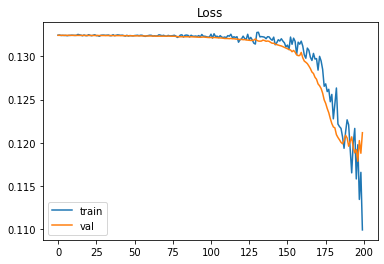

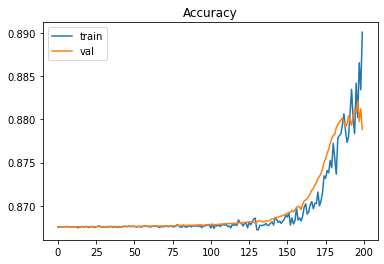

In [ ]:
# plot loss
plt.plot(history['loss_train'],'', history['loss_val'],'-')
plt.title('Loss')
plt.legend(['train','val'])
plt.show()
# plot accuracy
plt.plot(history['accuracy_train'],'', history['accuracy_val'],'-')
plt.title('Accuracy')
plt.legend(['train','val'])
plt.show()

# Confusion matrix

code marbut be ghesmate confusion matrix (ghesmate j ) baraye hamin shabake be surat mojaza dar file : "Q1-version1-ConfusionMatrix" gharar gerefte ast VA uniform sampling niz dar haman file anjam shode VA rahkare hale moshkele imbalanced dataset niz dar haman file dade shode ast.

#Web Cam

In [ ]:
data_train = np.genfromtxt('/content/drive/My Drive/deep/HW1/Q1_train.csv', delimiter=',')
data_train =data_train[1:,:]
data_test = np.genfromtxt('/content/drive/My Drive/deep/HW1/Q1_test.csv', delimiter=',')
data_test =data_test[1:,:]

for i in range(data_train.shape[0]):
   if data_train[i,0]>9 :
     data_train[i,0]=data_train[i,0]-1

for i in range(data_test.shape[0]):
   if data_test[i,0]>9 :
     data_test[i,0]=data_test[i,0]-1

In [ ]:
print(np.shape(data_train))
print(np.shape(data_test))

(27455, 785)
(7172, 785)


In [ ]:
data_train_withoutlabel = data_train[:,1:] 
data_test_withoutlabel = data_test[:,1:]
y_train = data_train[:,0]
y_test = data_test[:,0]

# standardize data
x_train =data_train_withoutlabel/255
x_test =data_test_withoutlabel/255

print(np.shape(x_test))
print(np.shape(x_train))
print(np.shape(y_test))
print(np.shape(y_train))

(7172, 784)
(27455, 784)
(7172,)
(27455,)


In [ ]:
# one-hot encoding of labels
y_train =tf.Session().run(tf.one_hot(y_train,24))
y_test =tf.Session().run(tf.one_hot(y_test,24))
tf.Session().close()

print(np.shape(x_train))
print(np.shape(x_test))
print(np.shape(y_train))
print(np.shape(y_test))

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_test = x_test.T
y_test = y_test.T

(27455, 784)
(7172, 784)
(27455, 24)
(7172, 24)


In [ ]:
X_train_shuffle = tf.Session().run(tf.random.shuffle(x_train,seed=12321))
Y_train_shuffle = tf.Session().run(tf.random.shuffle(y_train,seed=12321))

In [ ]:
# split train data into train and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
print(np.shape(X_train))
print(np.shape(X_val))
print(np.shape(Y_train))
print(np.shape(Y_val))

(21964, 784)
(5491, 784)
(21964, 24)
(5491, 24)


In [ ]:
class VanilaNN(object):
    """
    naive implemetation of Neural Network with desired layers and activations.
    """
    def __init__(self, layers_def={1:{"type":"fc","units":64,"activation":"sigmoid"},
                                     2:{"type":"fc","units":128,"activation":"sigmoid"},
                                     3:{"type":"fc","units":24,"activation":"softmax"}
                                    },loss="cross_entropy", optimizer='adam', optimizer_parameters={'beta1':0.9,'beta2':0.999,'epsilon':1e-8}):
        self.loss = loss
        self.optimizer = optimizer
        self.optimizer_parameters = optimizer_parameters
        self.adam_parameters = {}
        self.layer_parameters = {}
        self.activations = []
        self.units = []
        
        for key in layers_def:
            l = layers_def[key]
            self.units.append(l['units'])
            self.activations.append(l['activation'])
        
    def train(self,X, Y,X_val, Y_val, learning_rate = 0.001, batch_size = 64, num_epochs = 24,print_cost = True):
        N = np.shape(X)[1]
        
        #initialize layers' parameters
        L = len(self.units)
        input_dim = np.shape(X)[0]
        for i in range(L):
            w, b = initialize_parameters(self.units[i], input_dim)
            self.layer_parameters['W'+str(i+1)] = w
            self.layer_parameters['b'+str(i+1)] = b
            if self.optimizer == 'adam':
                self.adam_parameters['sw'+str(i+1)] = np.zeros_like(w)
                self.adam_parameters['sb'+str(i+1)] = np.zeros_like(b)
                self.adam_parameters['rw'+str(i+1)] = np.zeros_like(w)
                self.adam_parameters['rb'+str(i+1)] = np.zeros_like(b)
            input_dim = self.units[i]
        
        train_loss_hist = []
        train_acc_hist = []
        val_loss_hist = []
        val_acc_hist = []
        
        
        # Optimization loop
        for i in range(num_epochs):
            
            train_loss = 0
            # get random minibatches indices.
            minibatches = make_mini_batches(batch_size, N)
            minibatch_grads = {}
            for minibatch in minibatches:
                # Select a minibatch
                minibatch_X = X[:,minibatch]
                minibatch_Y = Y[:,minibatch]
                # Forward propagation
                a, caches = forward_propagation(minibatch_X, self.layer_parameters, self.activations)
                
                # Compute cost
                cost = compute_cost(a, minibatch_Y, self.loss)
                
                
                # Backward propagation
                grads = backward_propagation(a, minibatch_Y, caches, self.activations, self.loss)
                
                # Update parameters
                if self.optimizer == "sgd":
                    self.layer_parameters = update_parameters_with_gd(self.layer_parameters, grads, learning_rate)
                elif self.optimizer == "adam":
                    self.layer_parameters, self.adam_parameters = update_parameters_with_adam(
                        self.layer_parameters, grads, self.adam_parameters, learning_rate,
                        self.optimizer_parameters['beta1'], self.optimizer_parameters['beta2'],
                        self.optimizer_parameters['epsilon'])
                else:
                  raise NotImplementedError('Undefined optimizer')
                
                
                train_loss += cost
            
            train_loss_hist.append(train_loss/batch_size)
            train_acc_hist.append(1-train_loss/batch_size)
            
            test_acc, test_loss = self.evaluate(X_val, Y_val, 1)
            val_acc_hist.append(test_acc)
            val_loss_hist.append(test_loss)
            
            

        history = {'loss_train': train_loss_hist,
                   'loss_val': val_loss_hist,
                   'accuracy_train': train_acc_hist,
                   'accuracy_val': val_acc_hist}
        return history
    
    def evaluate(self, x_test, y_test,batch_size):
        """
        Arguments:
          x_test: input data, of shape (features, N)
          y_test : true label (num_classes, N)
        returns:
          acc, cost
        """
        N = x_test.shape[1]
        cost = 0
        
        for i in range(N):
            a, _ = forward_propagation(x_test[:, i], self.layer_parameters, self.activations)
            cost += compute_cost(a, y_test[:, i], self.loss)/N
        acc = 1 - cost
        
        return acc, cost
    def predict(self, x_test, batch_size=512):
        """
        Arguments:
          x_test: input data, of shape (features, N)
        returns:
          predicted values
        """
        N = x_test.shape[1]
        predictions = []
        
        for i in range(N):
            test_vec = x_test[:, i]
            a, _ = forward_propagation(test_vec, self.layer_parameters, self.activations)
            if self.activations[-1] != 'linear':
                y_hat = (a >= 0.5) * 1
            else:
                y_hat = (a > 0) * 1
            predictions.append(y_hat)            
                
        return predictions

In [ ]:
model = VanilaNN(layers_def={1:{"type":"fc","units":64,"activation":"relu"},
                                     #2:{"type":"fc","units":128,"activation":"relu"},
                                     2:{"type":"fc","units":24,"activation":"softmax"}
                                    }, optimizer='sgd', loss='cross_entropy')
history = model.train(X_train.T, Y_train.T, X_val.T, Y_val.T, learning_rate=1 , num_epochs=200)

In [ ]:
batch_size = 64
test_acc, test_loss = model.evaluate(x_test, y_test,batch_size)
print("Accuracy = %2.2f, Loss = %2.4f"%(test_acc, test_loss))

Accuracy = 0.96, Loss = 0.0433


function for rgb2gray

In [ ]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

##load new images

In [ ]:
from PIL import Image
img1 = rgb2gray(np.array(Image.open('/content/drive/My Drive/deep/HW1/image1.bmp')))
img2 = rgb2gray(np.array(Image.open('/content/drive/My Drive/deep/HW1/image2.bmp')))
img3 = rgb2gray(np.array(Image.open('/content/drive/My Drive/deep/HW1/image3.bmp')))
img4 = rgb2gray(np.array(Image.open('/content/drive/My Drive/deep/HW1/image4.bmp')))
print(np.shape(img4))

(487, 517)


##preprocess new images
resize , normalize and flatten new images

image1= (28, 28)
test1= (784,)


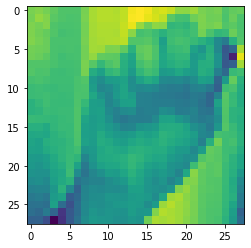

In [ ]:
image1 = np.array(Image.fromarray(img1).resize((28, 28), Image.ANTIALIAS))
image2 = np.array(Image.fromarray(img2).resize((28, 28), Image.ANTIALIAS))
image3 = np.array(Image.fromarray(img3).resize((28, 28), Image.ANTIALIAS))
image4 = np.array(Image.fromarray(img4).resize((28, 28), Image.ANTIALIAS))

#normalize
image1_n =image1/255
image2_n =image2/255
image3_n =image3/255
image4_n =image4/255

image1_n = scaler.fit_transform(image1_n)
image2_n = scaler.fit_transform(image2_n)
image3_n = scaler.fit_transform(image3_n)
image4_n = scaler.fit_transform(image4_n)

#flatten data
test1 =image1_n.flatten()
test2 =image2_n.flatten()
test3 =image3_n.flatten()
test4 =image4_n.flatten()

plt.imshow(image4_n)

new_test= np.zeros((784,4))
new_test[:,0]=test1[0:784]
new_test[:,1]=test2[0:784]
new_test[:,2]=test3[0:784]
new_test[:,3]=test4[0:784]
print('image1=',np.shape(image1))
print('test1=',np.shape(test1))
#print(np.shape(new_test1))

make a prediction

prediction of actual test data:  [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]  true label:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(784, 4)
prediction1:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
label of prediction1:  22


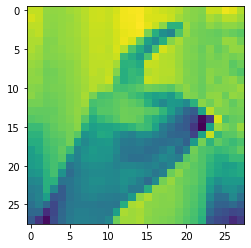

-------------------------------------
prediction2:  [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
label of prediction2:  6


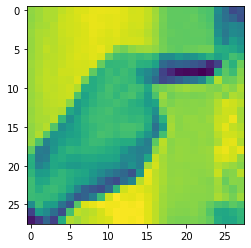

-------------------------------------
prediction3:  [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
label of prediction3:  7


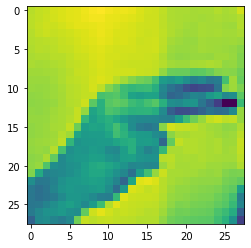

-------------------------------------
prediction4:  [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
label of prediction4:  12


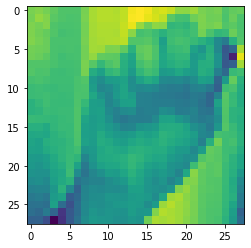

-------------------------------------


In [ ]:
# make a prediction of actual dataset:ALL NUM OF TEST = 7172
m = 550
# prediction by default data set ===> x_test & y_test
prediction = model.predict(x_test[:,m:m+1])
print('prediction of actual test data: ', prediction[0], " true label: ",y_test[:, m])

# prediction by new test-data 
print(np.shape(new_test))

n = 0
prediction1 = model.predict(new_test[:,n:n+1])
print('prediction1: ', prediction1[0])
print('label of prediction1: ', np.argmax(prediction1[0], axis=0))
plt.imshow(new_test[:,n:n+1].reshape(28,28))
plt.show()
print('-------------------------------------')

n = 1
prediction2 = model.predict(new_test[:,n:n+1])
print('prediction2: ', prediction2[0])
print('label of prediction2: ', np.argmax(prediction2[0], axis=0))
plt.imshow(new_test[:,n:n+1].reshape(28,28))
plt.show()
print('-------------------------------------')

n = 2
prediction3 = model.predict(new_test[:,n:n+1])
print('prediction3: ', prediction3[0])
print('label of prediction3: ', np.argmax(prediction3[0], axis=0))
plt.imshow(new_test[:,n:n+1].reshape(28,28))
plt.show()
print('-------------------------------------')

n = 3
prediction4 = model.predict(new_test[:,n:n+1])
print('prediction4: ', prediction4[0])
print('label of prediction4: ', np.argmax(prediction4[0], axis=0))
plt.imshow(new_test[:,n:n+1].reshape(28,28))
plt.show()
print('-------------------------------------')